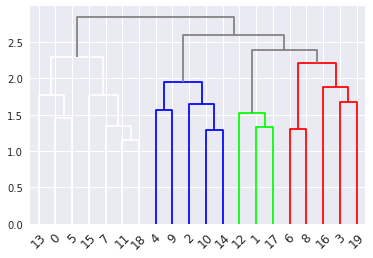

In [5]:
# Init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load data
from sklearn.datasets import load_diabetes

# Clustering
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list, linkage
from scipy.spatial import distance

%matplotlib inline

n = 20
A = np.random.rand(n,n)

dist_mat = A
linkage = linkage(dist_mat, "ward")
linkage_clusters = fcluster(linkage,4,criterion='maxclust')

# see question for code prior to "color mapping"
cmap = ["#FFFFFF","#0000FF","#00FF00","#FF0000"]
# Color mapping
dflt_col = "#808080"   # Unclustered gray
link_cols = {}
for i,v in enumerate(linkage_clusters):
    link_cols[i] = cmap[v-1]

# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
# link_cols = {}
for i, i12 in enumerate(linkage[:,:2].astype(int)):
    c1, c2 = (link_cols[x]
        for x in i12)
    link_cols[i+1+len(linkage)] = c1 if c1 == c2 else dflt_col
# Dendrogram
D = dendrogram(Z=linkage, color_threshold=None,
  leaf_font_size=12, leaf_rotation=45, link_color_func=lambda x: link_cols[x])